### Data import

In [3]:
import pandas as pd

train_data = pd.read_csv('adult.csv',delimiter=',',names=['age', 'workclass','final_weight','edu','edu_num','marital','occupation','relationship','race','sex','capital_gain','capital_loss','hours_perweek','country','salary'])
train_data.head()

,age,workclass,final_weight,edu,edu_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_perweek,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
num_cols = ['age','final_weight','edu_num','capital_gain','capital_loss','hours_perweek']
cat_cols = ['workclass','edu','marital','occupation','relationship','race','sex','country','salary']

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   workclass      32561 non-null  object
 2   final_weight   32561 non-null  int64 
 3   edu            32561 non-null  object
 4   edu_num        32561 non-null  int64 
 5   marital        32561 non-null  object
 6   occupation     32561 non-null  object
 7   relationship   32561 non-null  object
 8   race           32561 non-null  object
 9   sex            32561 non-null  object
 10  capital_gain   32561 non-null  int64 
 11  capital_loss   32561 non-null  int64 
 12  hours_perweek  32561 non-null  int64 
 13  country        32561 non-null  object
 14  salary         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Data Plots

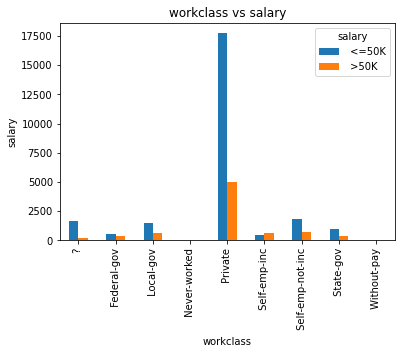

In [6]:
import matplotlib.pyplot as plt 

%matplotlib inline
pd.crosstab(train_data.workclass,train_data.salary).plot(kind='bar')
plt.title('workclass vs salary')
plt.xlabel('workclass')
plt.ylabel('salary')
plt.savefig('imgs/wrkcls_sal.png')

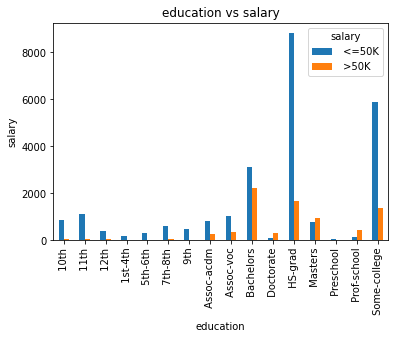

In [7]:
pd.crosstab(train_data.edu,train_data.salary).plot(kind='bar')
plt.title('education vs salary')
plt.xlabel('education')
plt.ylabel('salary')
plt.savefig('imgs/edu_sal.png')

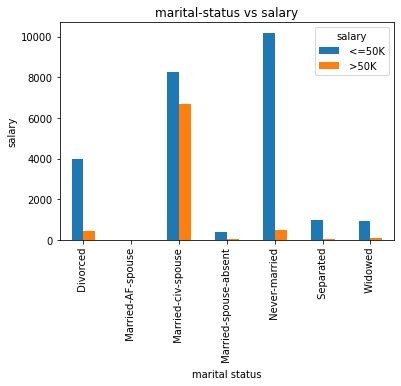

In [8]:
pd.crosstab(train_data.marital,train_data.salary).plot(kind='bar')
plt.title('marital-status vs salary')
plt.xlabel('marital status')
plt.ylabel('salary')
plt.savefig('imgs/mrtlsts_sal.png')

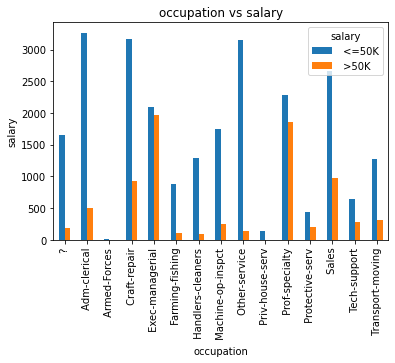

In [9]:
pd.crosstab(train_data.occupation,train_data.salary).plot(kind='bar')
plt.title('occupation vs salary')
plt.xlabel('occupation')
plt.ylabel('salary')
plt.savefig('imgs/occ_sal.png')

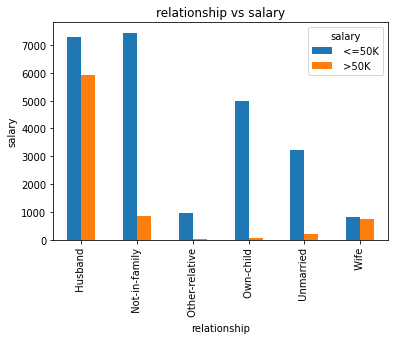

In [10]:
pd.crosstab(train_data.relationship,train_data.salary).plot(kind='bar')
plt.title('relationship vs salary')
plt.xlabel('relationship')
plt.ylabel('salary')
plt.savefig('imgs/rl_sal.png')

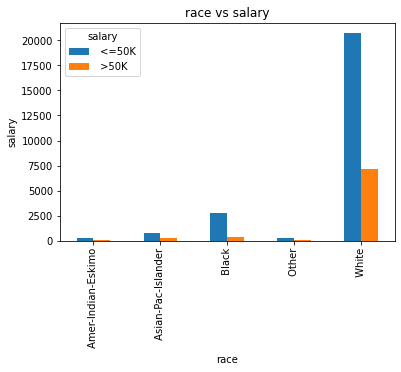

In [11]:
pd.crosstab(train_data.race,train_data.salary).plot(kind='bar')
plt.title('race vs salary')
plt.xlabel('race')
plt.ylabel('salary')
plt.savefig('imgs/race_sal.png')

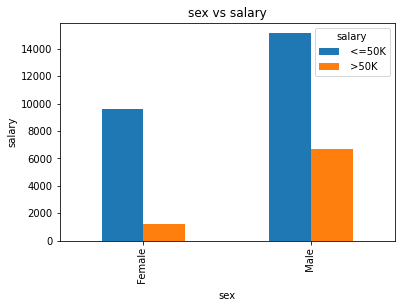

In [12]:
pd.crosstab(train_data.sex,train_data.salary).plot(kind='bar')
plt.title('sex vs salary')
plt.xlabel('sex')
plt.ylabel('salary')
plt.savefig('imgs/sex_sal.png')

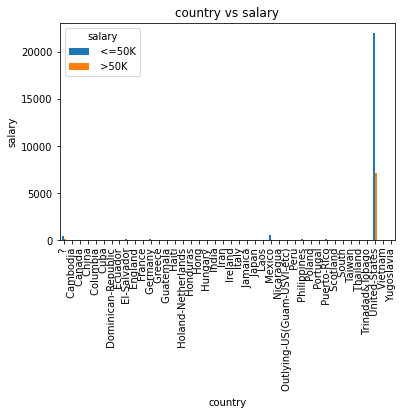

In [13]:
pd.crosstab(train_data.country,train_data.salary).plot(kind='bar')
plt.title('country vs salary')
plt.xlabel('country')
plt.ylabel('salary')
plt.savefig('imgs/country_sal.png')

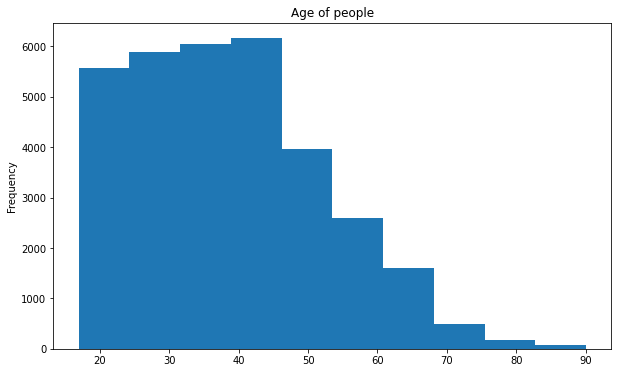

In [14]:
train_data['age'].plot(kind='hist', figsize=(10,6), title='Age of people',xlabel='Age')

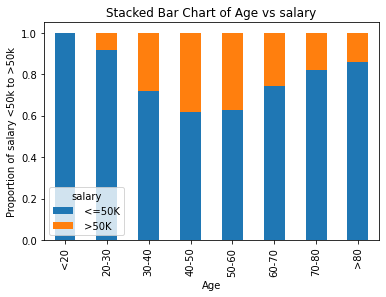

In [15]:
bins = [0.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0,150.0]
labels = ['<20','20-30', '30-40', '40-50', '50-60', '60-70', '70-80','>80']

table=pd.crosstab(pd.cut(train_data['age'], bins=bins, labels=labels),train_data.salary)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs salary')
plt.xlabel('Age')
plt.ylabel('Proportion of salary <50k to >50k')
plt.savefig('imgs/age.png')

### Data pre-processing

In [16]:
# checking correlation between numerical columns
corr = train_data[num_cols].corr()
corr.style.background_gradient(cmap='coolwarm',)

,age,final_weight,edu_num,capital_gain,capital_loss,hours_perweek
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
final_weight,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
edu_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_perweek,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [17]:
from scipy.stats import chi2_contingency#Testing the relationship

#chi_res = chi2_contingency(pd.crosstab(loan['Loan_Status'], loan['Gender']))
#print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

import itertools
comb = itertools.combinations(cat_cols, 2)
comb = list(comb)
for i in comb:
    chi_res = chi2_contingency(pd.crosstab(train_data[i[0]].astype('object',copy=True,errors='ignore'),train_data[i[1]].astype('object',copy=True,errors='ignore')))
    print(i[0]+' - '+i[1]+' p-value = '+str(chi_res[1]))

workclass - edu p-value = 0.0
workclass - marital p-value = 1.531121642660398e-264
workclass - occupation p-value = 0.0
workclass - relationship p-value = 3.445700331287451e-307
workclass - race p-value = 1.1256884540047491e-67
workclass - sex p-value = 1.0286039850311005e-160
workclass - country p-value = 3.6510642780637936e-13
workclass - salary p-value = 2.026505431120716e-220
edu - marital p-value = 1.1706731158022685e-282
edu - occupation p-value = 0.0
edu - relationship p-value = 0.0
edu - race p-value = 5.547319569858433e-116
edu - sex p-value = 1.667778440920507e-54
edu - country p-value = 0.0
edu - salary p-value = 0.0
marital - occupation p-value = 0.0
marital - relationship p-value = 0.0
marital - race p-value = 1.3087338193819433e-179
marital - sex p-value = 0.0
marital - country p-value = 1.325642820456137e-98
marital - salary p-value = 0.0
occupation - relationship p-value = 0.0
occupation - race p-value = 1.6090405792152354e-142
occupation - sex p-value = 0.0
occupation 

In [18]:
(train_data.capital_loss == 0).sum()

31042

In [19]:
(train_data.capital_gain == 0).sum()

29849

most values 0 this feature can be eliminated

### Pre-processing pipeline

In [44]:
# preprocessing
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import LabelEncoder

def preprocessing(data,drop_cols,numeric_cols,categorical_cols):
    # drop unwanted columns
    df = data.copy()
    df = df.drop(drop_cols,axis=1)
    
    # Impute missing values
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col],errors='coerce')
    for col in categorical_cols:
        df[col] = df[col].astype('object',copy=True,errors='ignore')
    
    imputer_num = SimpleImputer(strategy ='mean')
    imputer_cat = SimpleImputer(strategy='most_frequent')

    imputer_num = imputer_num.fit(df[numeric_cols])
    imputer_cat = imputer_cat.fit(df[categorical_cols]) 

    df[numeric_cols] = imputer_num.transform(df[numeric_cols])
    df[categorical_cols] = imputer_cat.transform(df[categorical_cols])
    
    # label categorical columns
    labelencoder = LabelEncoder()
    for col in categorical_cols:
        df[col] = labelencoder.fit_transform(df[col])
        
    return df

In [45]:
num_cols = ['age','edu_num','final_weight','hours_perweek']
cat_cols = ['workclass','edu','marital','occupation','relationship','race','sex','salary']

data = preprocessing(train_data,['capital_loss','capital_gain','country'],num_cols,cat_cols)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            32561 non-null  float64
 1   workclass      32561 non-null  int64  
 2   final_weight   32561 non-null  float64
 3   edu            32561 non-null  int64  
 4   edu_num        32561 non-null  float64
 5   marital        32561 non-null  int64  
 6   occupation     32561 non-null  int64  
 7   relationship   32561 non-null  int64  
 8   race           32561 non-null  int64  
 9   sex            32561 non-null  int64  
 10  hours_perweek  32561 non-null  float64
 11  salary         32561 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 3.0 MB


In [47]:
data.head()

,age,workclass,final_weight,edu,edu_num,marital,occupation,relationship,race,sex,hours_perweek,salary
0,39.0,7,77516.0,9,13.0,4,1,1,4,1,40.0,0
1,50.0,6,83311.0,9,13.0,2,4,0,4,1,13.0,0
2,38.0,4,215646.0,11,9.0,0,6,1,4,1,40.0,0
3,53.0,4,234721.0,1,7.0,2,6,0,2,1,40.0,0
4,28.0,4,338409.0,9,13.0,2,10,5,2,0,40.0,0


### Naive Bayes Regression Model

In [48]:
# train test split
from sklearn.model_selection import train_test_split

X = data.drop('salary',axis=1)
y = data['salary']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=143,stratify = y)

In [49]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(X_train, y_train)

In [50]:
print (clf.score(X_train, y_train))

0.7927612927612928


In [51]:
y_pred = clf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [53]:
from sklearn.metrics import accuracy_score

y_pred_cnb = clf.predict(X_test)
y_prob_pred_cnb = clf.predict_proba(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred_cnb).sum()

print("CategoricalNB")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred_cnb)
print('Accuracy: {:.2f}'.format(accuracy))

CategoricalNB
Misclassified samples: 2318
Accuracy: 0.80


In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      8652
           1       0.66      0.33      0.44      2745

    accuracy                           0.80     11397
   macro avg       0.74      0.64      0.66     11397
weighted avg       0.78      0.80      0.77     11397



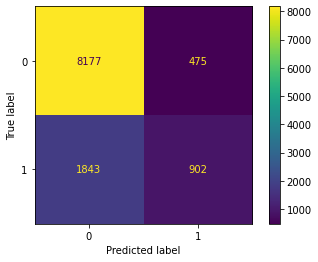

In [55]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)  

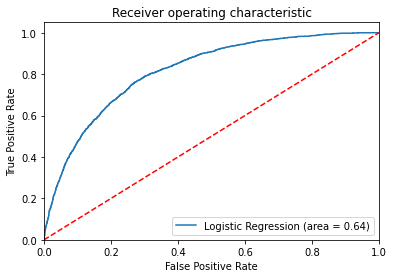

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Attempt 2

In [91]:
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import LabelEncoder

def preprocessing(data,drop_cols,numeric_cols,categorical_cols):
    # drop unwanted columns
    df = data.copy()
    df = df.drop(drop_cols,axis=1)
    
    # Impute missing values
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col],errors='coerce')
    for col in categorical_cols:
        df[col] = df[col].astype('object',copy=True,errors='ignore')
    
    imputer_num = SimpleImputer(strategy ='mean')
    imputer_cat = SimpleImputer(strategy='most_frequent')

    imputer_num = imputer_num.fit(df[numeric_cols])
    imputer_cat = imputer_cat.fit(df[categorical_cols]) 

    df[numeric_cols] = imputer_num.transform(df[numeric_cols])
    df[categorical_cols] = imputer_cat.transform(df[categorical_cols])
    
    # label categorical columns
    labelencoder = LabelEncoder()
    for col in categorical_cols:
        df[col] = labelencoder.fit_transform(df[col])
        
    df1 = df[numeric_cols+['salary']]
    df2 = df[categorical_cols]
        
    return [df1,df2]

In [92]:
data1,data2 = preprocessing(train_data,['capital_loss','capital_gain','country'],num_cols,cat_cols)

In [93]:
data1.head()

,age,edu_num,final_weight,hours_perweek,salary
0,39.0,13.0,77516.0,40.0,0
1,50.0,13.0,83311.0,13.0,0
2,38.0,9.0,215646.0,40.0,0
3,53.0,7.0,234721.0,40.0,0
4,28.0,13.0,338409.0,40.0,0


In [94]:
data2.head()

,workclass,edu,marital,occupation,relationship,race,sex,salary
0,7,9,4,1,1,4,1,0
1,6,9,2,4,0,4,1,0
2,4,11,0,6,1,4,1,0
3,4,1,2,6,0,2,1,0
4,4,9,2,10,5,2,0,0


#### model 1 continuous data

In [95]:
X1 = data1.drop('salary',axis=1)
y1 = data1['salary']

In [96]:
from sklearn.naive_bayes import GaussianNB

clf1 = GaussianNB().fit(X1, y1)

In [97]:
print (clf1.score(X1, y1))

0.7775252602807039


In [104]:
gaussian_probas = clf1.predict_proba(X1)

#### model 2 categorical data

In [99]:
X2 = data2.drop('salary',axis=1)
y2 = data2['salary']

In [101]:
from sklearn.naive_bayes import CategoricalNB

clf2 = CategoricalNB().fit(X2, y2)

In [102]:
print (clf2.score(X2, y2))

0.7949694419704555


In [105]:
categorical_probas = clf2.predict_proba(X2)

In [107]:
data_new = np.hstack((categorical_probas, gaussian_probas))

#### model merged

In [110]:
data_final = pd.DataFrame(data_new)

In [111]:
data_final['salary'] = data['salary']

In [112]:
data_final 

,0,1,2,3,salary
0,0.967207,0.032793,0.663740,0.336260,0
1,0.037347,0.962653,0.892275,0.107725,0
2,0.992914,0.007086,0.768324,0.231676,0
3,0.960154,0.039846,0.726035,0.273965,0
4,0.331821,0.668179,0.827339,0.172661,0
...,...,...,...,...,...
32556,0.448076,0.551924,0.857963,0.142037,0
32557,0.574785,0.425215,0.746485,0.253515,1
32558,0.997812,0.002188,0.673365,0.326635,0
32559,0.999198,0.000802,0.978019,0.021981,0


In [113]:
# train test split
from sklearn.model_selection import train_test_split

Xf = data_final.drop('salary',axis=1)
yf = data_final['salary']
Xf_train,Xf_test,yf_train,yf_test = train_test_split(Xf,yf,test_size=0.35,random_state=143,stratify = yf)

In [114]:
from sklearn.naive_bayes import GaussianNB

clff = GaussianNB().fit(Xf_train, yf_train)

In [115]:
print (clff.score(Xf_train, yf_train))

0.8129370629370629


In [116]:
yf_pred = clff.predict(Xf_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clff.score(Xf_test, yf_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [117]:
from sklearn.metrics import classification_report

print(classification_report(yf_test, yf_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      8652
           1       0.60      0.73      0.66      2745

    accuracy                           0.82     11397
   macro avg       0.76      0.79      0.77     11397
weighted avg       0.84      0.82      0.83     11397



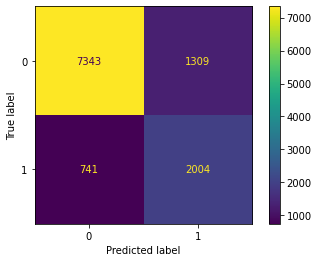

In [118]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clff, Xf_test, yf_test) 

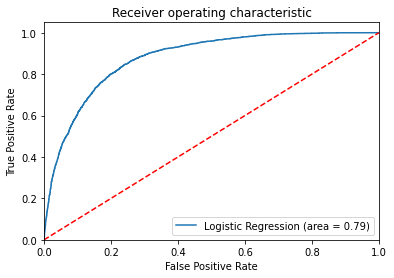

In [119]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

logit_roc_auc = roc_auc_score(yf_test, clff.predict(Xf_test))
fpr, tpr, thresholds = roc_curve(yf_test, clff.predict_proba(Xf_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()